# KNN classification on build-in Iris dataset

## Load dataset

In [26]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
print(iris.keys())

species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris['species'] = species

iris.head()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [28]:
iris['count'] = 1
iris[['species', 'count']].groupby('species').count()

,count
species,
setosa,50
versicolor,50
virginica,50


## Prepare dataset

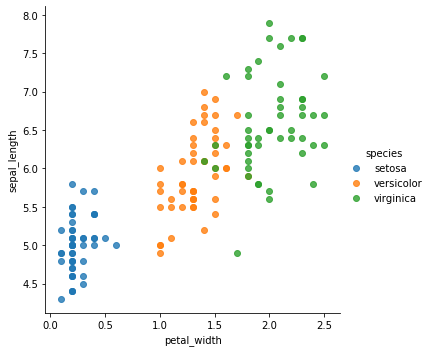

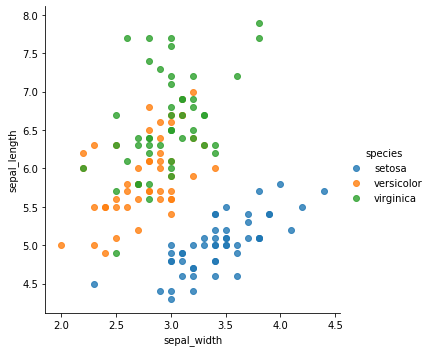

In [29]:
%matplotlib inline

def plot_iris(iris, col1, col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    sns.lmplot(x=col1, y=col2, data=iris, hue='species', fit_reg=False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

plot_iris(iris, 'petal_width', 'sepal_length')
plot_iris(iris, 'sepal_width', 'sepal_length')

### Normalize data

In [34]:
from sklearn.preprocessing import scale

num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_scaled = scale(iris[num_cols])
iris_scaled = pd.DataFrame(iris_scaled, columns= num_cols)

print(iris_scaled.head())
print('\n')
print(iris_scaled.describe().round(3))


   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444
2     -1.385353     0.328414     -1.397064    -1.315444
3     -1.506521     0.098217     -1.283389    -1.315444
4     -1.021849     1.249201     -1.340227    -1.315444


       sepal_length  sepal_width  petal_length  petal_width
count       150.000      150.000       150.000      150.000
mean         -0.000       -0.000        -0.000       -0.000
std           1.003        1.003         1.003        1.003
min          -1.870       -2.434        -1.568       -1.447
25%          -0.901       -0.592        -1.227       -1.184
50%          -0.053       -0.132         0.336        0.133
75%           0.675        0.559         0.763        0.791
max           2.492        3.091         1.786        1.712


In [45]:
import numpy as np

print(np.unique(iris['species']))

['setosa' 'versicolor' 'virginica']


750

In [40]:
levels = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris_scaled['species'] = [levels[x] for x in iris['species']]
iris_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


### Split training and test set

In [53]:
from sklearn.model_selection import train_test_split

np.random.seed(3456)

iris_split = train_test_split(np.asmatrix(iris_scaled), test_size = 0.4)

iris_train_features = iris_split[0][:,:4]
iris_train_labels = np.ravel(iris_split[0][:, 4])

iris_test_features = iris_split[1][:,:4]
iris_test_labels = np.ravel(iris_split[1][:, 4])

print(iris_train_features.shape)
print(iris_train_labels.shape)
print(iris_test_features.shape)
print(iris_test_labels.shape)

(90, 4)
(90,)
(60, 4)
(60,)


## Train KNN model

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn_mod = KNeighborsClassifier(n_neighbors=3)
knn_mod.fit(iris_train_features, iris_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Evaluate model

In [57]:
iris_test = pd.DataFrame(iris_test_features, columns=num_cols)
iris_test['predicted'] = knn_mod.predict(iris_test_features)
iris_test['correct'] = [1 if x == z else 0 for x, z in zip(iris_test['predicted'], iris_test_labels)]
accuracy = 100.0 * float(sum(iris_test['correct'])) / float(iris_test.shape[0])
print(accuracy)

96.66666666666667


## Visualization

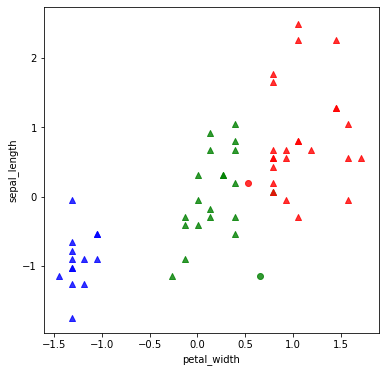

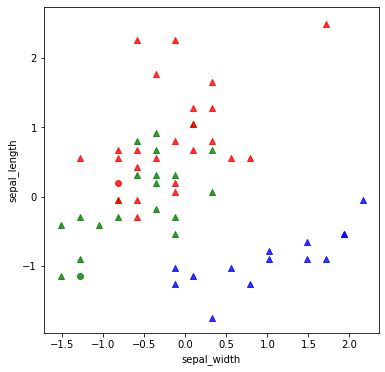

In [60]:
levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
iris_test['species'] = [levels[x] for x in iris_test['predicted']]
markers = {1:'^', 0:'o'}
colors = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}

def plot_shapes(df, col1,col2,  markers, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
    for m in markers: # iterate over marker dictioary keys
        for c in colors: # iterate over color dictionary keys
            df_temp = df[(df['correct'] == m)  & (df['species'] == c)]
            sns.regplot(x = col1, y = col2, data = df_temp, fit_reg = False, scatter_kws={'color': colors[c]}, marker = markers[m], ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)

plot_shapes(iris_test, 'petal_width', 'sepal_length', markers, colors)
plot_shapes(iris_test, 'sepal_width', 'sepal_length', markers, colors)